In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
#nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# text preprocessing
import contractions
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ii 2023/CS116/Data/data_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ii 2023/CS116/Data/data_test.csv')

X_train = df_train.Text
X_test = df_test.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())

data.head()

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [ ]:
y_train

0       neutral
1       sadness
2          fear
3          fear
4         anger
         ...   
7929    sadness
7930      anger
7931    sadness
7932       fear
7933      anger
Name: Emotion, Length: 7934, dtype: object

In [ ]:
sentence = df_train.Text[7930]
sentence

'Irina hung up in exasperation . '

## Chuyển từng word trong sentence bằng Lemma

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def lemmatizer_token(review):
    review = contractions.fix(review)  
    review = review.lower()
    review = re.sub("(<.*?>)", "", review)
    review = re.sub(r'http\S+', '', review)
    review= re.sub(r"(#[\d\w\.]+)", '', review)
    review= re.sub(r"(@[\d\w\.]+)", '', review)
    review = re.sub("(\\W|\\d)", " ", review)
    review = review.strip()

    review = word_tokenize(review)
    lemmatizer = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    lemma = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review if word not in string.punctuation if not word in set(all_stopwords)]
    #lemma = ' '.join(lemma)
    #text.append(lemma)

    return lemma

In [ ]:
print(df_test['Text'][46])
print(lemmatizer_token(df_test['Text'][46]))

 I didn't like her butting in where I didn't want her . She's a chatter box . 
['not', 'like', 'butting', 'not', 'want', 'chatter', 'box']


In [ ]:
print(df_train['Text'][0])
print(lemmatizer_token(df_train['Text'][0]))

 There are tons of other paintings that I think are better . 
['ton', 'painting', 'think', 'well']


In [ ]:
words = []
for i in range(len(df_train)):
  words.append(lemmatizer_token(df_train['Text'][i]))

res = []
for i in range(len(words)):
  for j in range(len(words[i])):
    res.append(words[i][j])

In [ ]:
len(res)

59048

## Dùng TFIDF để get feature

In [ ]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=lemmatizer_token, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(X_train_vect[0])

  (0, 63029)	0.21673999437414293
  (0, 58933)	0.45381381735832493
  (0, 58932)	0.43472982533905613
  (0, 57643)	0.3885652176763226
  (0, 57484)	0.22399539141018943
  (0, 41506)	0.45381381735832493
  (0, 41499)	0.3885652176763226


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Thống kê số liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Emotion', ylabel='count'>

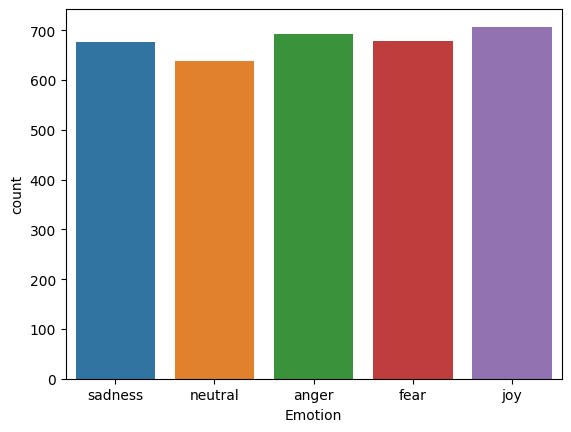

In [ ]:
sns.countplot(x=df_test['Emotion'])

In [ ]:
df_test['Emotion']

0       sadness
1       neutral
2         anger
3          fear
4       sadness
         ...   
3388    sadness
3389    sadness
3390    neutral
3391    sadness
3392      anger
Name: Emotion, Length: 3393, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordCloud(df, emotion):
  text = " ".join(cat for cat in df['Text'][df['Emotion'] == emotion])
  wordcloud = WordCloud(width = 800, height = 400, background_color ='white', min_font_size = 10).generate(text)

  plt.figure(figsize = (6, 4), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

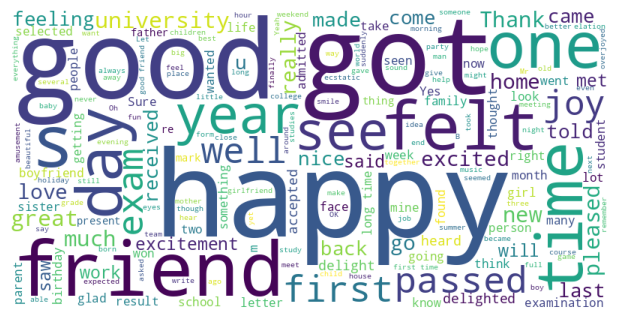

In [ ]:
wordCloud(df_train, class_names[0])

## Các pp Machine Learning

Accuracy: 68.85%

F1 Score: 68.85

COnfusion Matrix:
 [[522  50  64  14  43]
 [104 462  70   5  38]
 [ 62  28 555  38  24]
 [ 83  42 118 360  35]
 [123  44  62  10 437]]


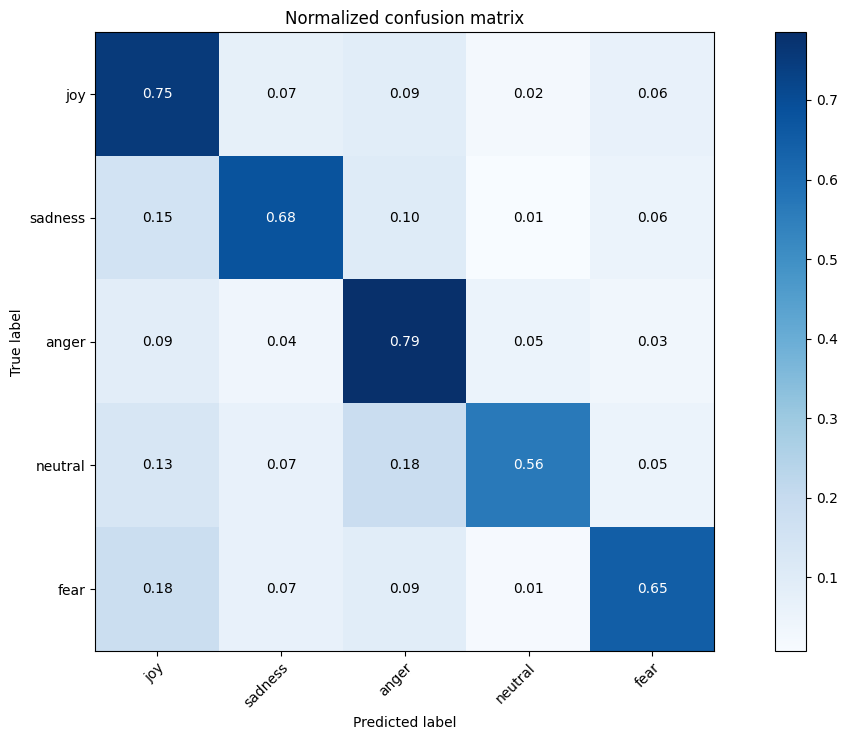

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Accuracy: 60.30%

F1 Score: 60.30

COnfusion Matrix:
 [[362  82  80  82  87]
 [107 406  59  49  58]
 [ 75  54 411  96  71]
 [ 39  25  50 484  40]
 [ 93  77  68  55 383]]


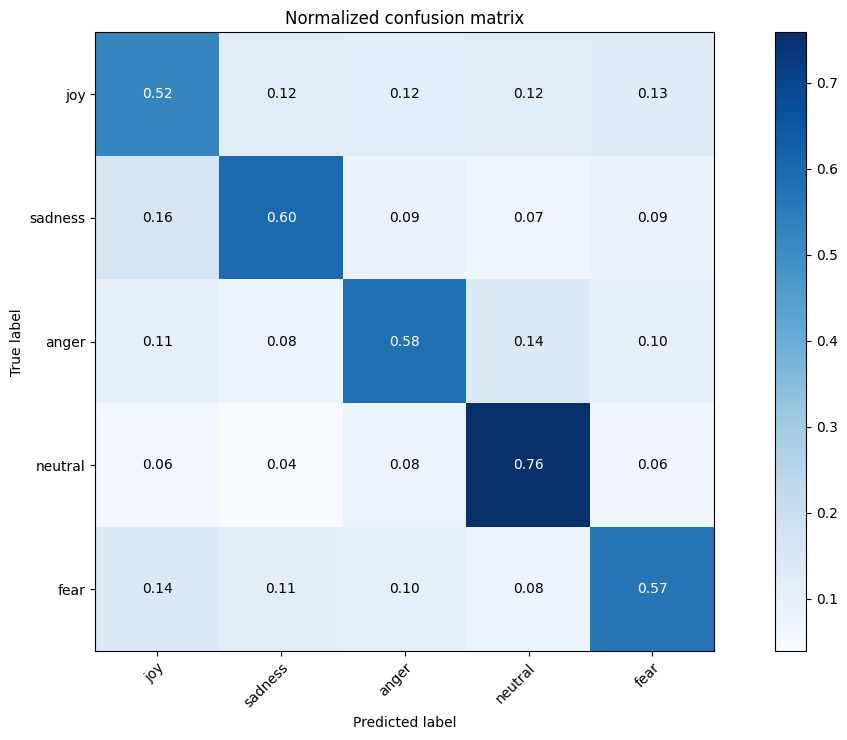

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_vect, y_train)

yrf_pred = dt.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 68.49%

F1 Score: 68.49

COnfusion Matrix:
 [[464  44  48  88  49]
 [ 74 465  39  59  42]
 [ 46  28 474 124  35]
 [ 40  35  58 466  39]
 [ 79  38  43  61 455]]


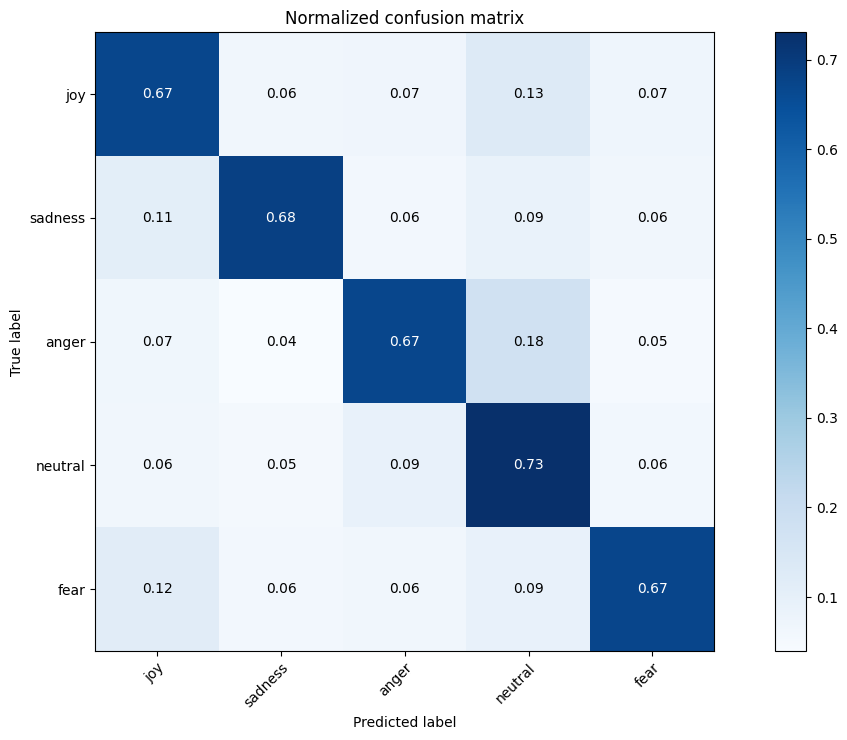

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Changing the hyperparameter

## SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

start = time.process_time()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear', 'poly', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_vect, y_train)
end = time.process_time()

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.333 total time=   7.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.345 total time=   6.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.361 total time=   7.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.357 total time=   6.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.358 total time=   7.4s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.231 total time=   7.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.246 total time=   7.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.237 total time=   7.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.244 total time=   7.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.249 total time=   6.9s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.264 total time=   7.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test_vect)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       anger       0.64      0.73      0.68       693
        fear       0.73      0.70      0.72       679
         joy       0.67      0.76      0.71       707
     neutral       0.76      0.63      0.69       638
     sadness       0.74      0.68      0.71       676

    accuracy                           0.70      3393
   macro avg       0.71      0.70      0.70      3393
weighted avg       0.71      0.70      0.70      3393



Accuracy: 70.09%

F1 Score: 70.09

COnfusion Matrix:
 [[506  53  54  31  49]
 [ 87 477  61  10  44]
 [ 51  31 535  60  30]
 [ 55  45 100 403  35]
 [ 93  46  51  29 457]]


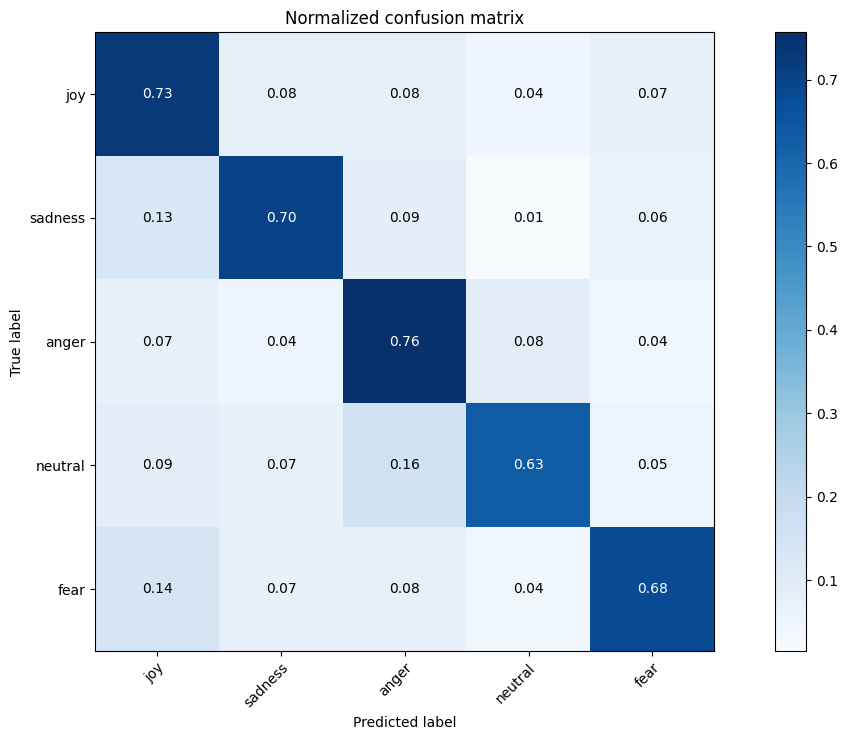

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, grid_predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, grid_predictions, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
plot_confusion_matrix(y_test, grid_predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Logistic

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
              'C':[0.01,0.1,1,10,100],
			'solver': ['newton-cg','lbfgs','liblinear'],
      'multi_class': ['auto', 'ovr', 'multinomial'],
      'max_iter': [100,200,300]}

grid = GridSearchCV(LogisticRegression(), param_grid, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_vect, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END C=0.01, max_iter=100, multi_class=auto, solver=newton-cg;, score=0.374 total time=   0.4s
[CV 2/5] END C=0.01, max_iter=100, multi_class=auto, solver=newton-cg;, score=0.396 total time=   0.4s
[CV 3/5] END C=0.01, max_iter=100, multi_class=auto, solver=newton-cg;, score=0.389 total time=   0.5s
[CV 4/5] END C=0.01, max_iter=100, multi_class=auto, solver=newton-cg;, score=0.388 total time=   0.4s
[CV 5/5] END C=0.01, max_iter=100, multi_class=auto, solver=newton-cg;, score=0.371 total time=   0.4s
[CV 1/5] END C=0.01, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.374 total time=   1.2s
[CV 2/5] END C=0.01, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.396 total time=   1.8s
[CV 3/5] END C=0.01, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.389 total time=   2.2s
[CV 4/5] END C=0.01, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.388 total time=   1.6s
[CV 5/5] END C=0.01, max_i

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.673 total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.662 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.686 total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.672 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.659 total time=   9.6s
[CV 1/5] END C=1, max_iter=100, multi_class=auto, solver=liblinear;, score=0.665 total time=   0.3s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, solver=liblinear;, score=0.653 total time=   0.2s
[CV 3/5] END C=1, max_iter=100, multi_class=auto, solver=liblinear;, score=0.679 total time=   0.2s
[CV 4/5] END C=1, max_iter=100, multi_class=auto, solver=liblinear;, score=0.664 total time=   0.2s
[CV 5/5] END C=1, max_iter=100, multi_class=auto, solver=liblinear;, score=0.659 total time=   0.2s
[CV 1/5] END C=1, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.665 total time=   0.8s
[CV 2/5] END C=1, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.653 total time=   0.8s
[CV 3/5] END C=1, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.679 total time=   0.7s
[CV 4/5] END C=1, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.664 total time=   0.9s
[CV 5/5]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.673 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.662 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.686 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.672 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.659 total time=   9.6s
[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.673 total time=   0.9s
[CV 2/5] END C=1, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.662 total time=   0.9s
[CV 3/5] END C=1, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.686 total time=   0.9s
[CV 4/5] END C=1, max_iter=200, multi_class=auto, solver=newton-cg;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.669 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.649 total time=   9.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.679 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.674 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.650 total time=  10.2s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, solver=liblinear;, score=0.674 total time=   0.4s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, solver=liblinear;, score=0.662 total time=   0.4s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, solver=liblinear;, score=0.689 total time=   0.4s
[CV 4/5] END C=10, max_iter=100, multi_class=auto, solver=liblinear;, score=0.679 total time=   0.4s
[CV 5/5] END C=10, max_iter=100, multi_class=auto, solver=liblinear;, score=0.670 total time=   0.4s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.674 total time=   1.2s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.662 total time=   1.2s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.689 total time=   1.5s
[CV 4/5] END C=10, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.679 total time=   2.5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.674 total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.662 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.689 total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.679 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.670 total time=   9.6s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.674 total time=   0.4s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.662 total time=   0.4s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.689 total time=   0.4s
[CV 4/5] END C=10, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.679 total time=   0.4s
[CV 5/5] END C=10, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.670 total time=   0.4s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.669 total time=   1.5s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.652 total time=   1.4s
[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.679 total time=   1.6s
[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, solver=newton-cg;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.669 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.649 total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.679 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.674 total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.650 total time=  10.0s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.669 total time=   1.4s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.652 total time=   1.4s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.679 total time=   1.6s
[CV 4/5] END C=10, max_iter=200, multi_class=auto, solver=newto

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.670 total time=  20.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.652 total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.679 total time=  17.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.670 total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.653 total time=  18.8s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, solver=liblinear;, score=0.674 total time=   0.4s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, solver=liblinear;, score=0.662 total time=   0.4s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, solver=liblinear;, score=0.689 total time=   0.4s
[CV 4/5] END C=10, max_iter=200, multi_class=auto, solver=liblinear;, score=0.679 total time=   0.4s
[CV 5/5] END C=10, max_iter=200, multi_class=auto, solver=liblinear;, score=0.670 total time=   0.4s
[CV 1/5] END C=10, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.674 total time=   1.3s
[CV 2/5] END C=10, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.662 total time=   1.1s
[CV 3/5] END C=10, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.689 total time=   1.2s
[CV 4/5] END C=10, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.679 total time=   1.2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.670 total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.652 total time=  18.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.679 total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.670 total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.653 total time=  17.4s
[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.669 total time=   1.5s
[CV 2/5] END C=10, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.652 total time=   1.4s
[CV 3/5] END C=10, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.679 total time=   1.7s
[CV 4/5] END C=10, max_iter=300, multi_class=auto, solver=newto

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.663 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.633 total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.653 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.660 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=100, multi_class=auto, solver=lbfgs;, score=0.642 total time=  10.2s
[CV 1/5] END C=100, max_iter=100, multi_class=auto, solver=liblinear;, score=0.660 total time=   0.8s
[CV 2/5] END C=100, max_iter=100, multi_class=auto, solver=liblinear;, score=0.641 total time=   0.6s
[CV 3/5] END C=100, max_iter=100, multi_class=auto, solver=liblinear;, score=0.665 total time=   0.7s
[CV 4/5] END C=100, max_iter=100, multi_class=auto, solver=liblinear;, score=0.664 total time=   0.6s
[CV 5/5] END C=100, max_iter=100, multi_class=auto, solver=liblinear;, score=0.653 total time=   0.7s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.660 total time=   2.1s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.641 total time=   3.6s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.664 total time=   2.3s
[CV 4/5] END C=100, max_iter=100, multi_class=ovr, solver=newton-cg;, score=0.664 total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.664 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.641 total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.666 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.665 total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=100, multi_class=ovr, solver=lbfgs;, score=0.658 total time=   8.2s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.660 total time=   0.8s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.641 total time=   0.7s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.665 total time=   0.7s
[CV 4/5] END C=100, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.664 total time=   0.6s
[CV 5/5] END C=100, max_iter=100, multi_class=ovr, solver=liblinear;, score=0.653 total time=   0.7s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.660 total time=   5.1s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.630 total time=   2.6s
[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, solver=newton-cg;, score=0.664 total time=   2.6s
[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, solver=newto

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.663 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.633 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.653 total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.660 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, solver=lbfgs;, score=0.642 total time=  10.0s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.660 total time=   2.9s
[CV 2/5] END C=100, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.630 total time=   2.6s
[CV 3/5] END C=100, max_iter=200, multi_class=auto, solver=newton-cg;, score=0.664 total time=   3.5s
[CV 4/5] END C=100, max_iter=200, multi_class=auto, so

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.663 total time=  17.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.631 total time=  17.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.664 total time=  19.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.657 total time=  17.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=200, multi_class=auto, solver=lbfgs;, score=0.642 total time=  17.3s
[CV 1/5] END C=100, max_iter=200, multi_class=auto, solver=liblinear;, score=0.660 total time=   0.8s
[CV 2/5] END C=100, max_iter=200, multi_class=auto, solver=liblinear;, score=0.641 total time=   0.6s
[CV 3/5] END C=100, max_iter=200, multi_class=auto, solver=liblinear;, score=0.665 total time=   0.7s
[CV 4/5] END C=100, max_iter=200, multi_class=auto, solver=liblinear;, score=0.664 total time=   0.6s
[CV 5/5] END C=100, max_iter=200, multi_class=auto, solver=liblinear;, score=0.653 total time=   0.6s
[CV 1/5] END C=100, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.660 total time=   3.0s
[CV 2/5] END C=100, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.641 total time=   3.0s
[CV 3/5] END C=100, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.664 total time=   1.9s
[CV 4/5] END C=100, max_iter=200, multi_class=ovr, solver=newton-cg;, score=0.664 total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=200, multi_class=ovr, solver=lbfgs;, score=0.661 total time=  16.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=200, multi_class=ovr, solver=lbfgs;, score=0.641 total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=200, multi_class=ovr, solver=lbfgs;, score=0.665 total time=  18.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=200, multi_class=ovr, solver=lbfgs;, score=0.664 total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=200, multi_class=ovr, solver=lbfgs;, score=0.653 total time=  16.4s
[CV 1/5] END C=100, max_iter=200, multi_class=ovr, solver=liblinear;, score=0.660 total time=   0.8s
[CV 2/5] END C=100, max_iter=200, multi_class=ovr, solver=liblinear;, score=0.641 total time=   0.6s
[CV 3/5] END C=100, max_iter=200, multi_class=ovr, solver=liblinear;, score=0.665 total time=   0.7s
[CV 4/5] END C=100, max_iter=200, multi_class=ovr, solver=liblinear;, score=0.664 total time=   0.6s
[CV 5/5] END C=100, max_iter=200, multi_class=ovr, solver=liblinear;, score=0.653 total time=   0.7s
[CV 1/5] END C=100, max_iter=200, multi_class=multinomial, solver=newton-cg;, score=0.660 total time=   3.1s
[CV 2/5] END C=100, max_iter=200, multi_class=multinomial, solver=newton-cg;, score=0.630 total time=   2.7s
[CV 3/5] END C=100, max_iter=200, multi_class=multinomial, solver=newton-cg;, score=0.664 total time=   4.7s
[CV 4/5] END C=100, max_iter=200, multi_class=multinomial, solver=newto

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.663 total time=  17.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.631 total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.664 total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.657 total time=  17.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=200, multi_class=multinomial, solver=lbfgs;, score=0.642 total time=  18.3s
[CV 1/5] END C=100, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.660 total time=   5.0s
[CV 2/5] END C=100, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.630 total time=   2.7s
[CV 3/5] END C=100, max_iter=300, multi_class=auto, solver=newton-cg;, score=0.664 total time=   2.6s
[CV 4/5] END C=100, max_iter=300, multi_class=auto, so

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=300, multi_class=auto, solver=lbfgs;, score=0.659 total time=  26.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=300, multi_class=auto, solver=lbfgs;, score=0.631 total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=300, multi_class=auto, solver=lbfgs;, score=0.662 total time=  27.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=300, multi_class=auto, solver=lbfgs;, score=0.655 total time=  26.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=300, multi_class=auto, solver=lbfgs;, score=0.643 total time=  26.7s
[CV 1/5] END C=100, max_iter=300, multi_class=auto, solver=liblinear;, score=0.660 total time=   0.8s
[CV 2/5] END C=100, max_iter=300, multi_class=auto, solver=liblinear;, score=0.641 total time=   0.7s
[CV 3/5] END C=100, max_iter=300, multi_class=auto, solver=liblinear;, score=0.665 total time=   0.7s
[CV 4/5] END C=100, max_iter=300, multi_class=auto, solver=liblinear;, score=0.664 total time=   0.6s
[CV 5/5] END C=100, max_iter=300, multi_class=auto, solver=liblinear;, score=0.653 total time=   0.7s
[CV 1/5] END C=100, max_iter=300, multi_class=ovr, solver=newton-cg;, score=0.660 total time=   1.9s
[CV 2/5] END C=100, max_iter=300, multi_class=ovr, solver=newton-cg;, score=0.641 total time=   1.8s
[CV 3/5] END C=100, max_iter=300, multi_class=ovr, solver=newton-cg;, score=0.664 total time=   3.4s
[CV 4/5] END C=100, max_iter=300, multi_class=ovr, solver=newton-cg;, score=0.664 total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=300, multi_class=multinomial, solver=lbfgs;, score=0.659 total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=300, multi_class=multinomial, solver=lbfgs;, score=0.631 total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=300, multi_class=multinomial, solver=lbfgs;, score=0.662 total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=300, multi_class=multinomial, solver=lbfgs;, score=0.655 total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceb

[CV 5/5] END C=100, max_iter=300, multi_class=multinomial, solver=lbfgs;, score=0.643 total time=  26.4s
[CV 1/5] END C=100, max_iter=300, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, multi_class=multinomial, solver=liblinear;, score=nan total time=   0.0s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear'}
LogisticRegression(C=10, solver='liblinear')


Accuracy: 68.55%

F1 Score: 68.55

COnfusion Matrix:
 [[440  43  37 120  53]
 [ 51 460  35  88  45]
 [ 38  28 462 146  33]
 [ 27  26  48 503  34]
 [ 66  34  38  77 461]]


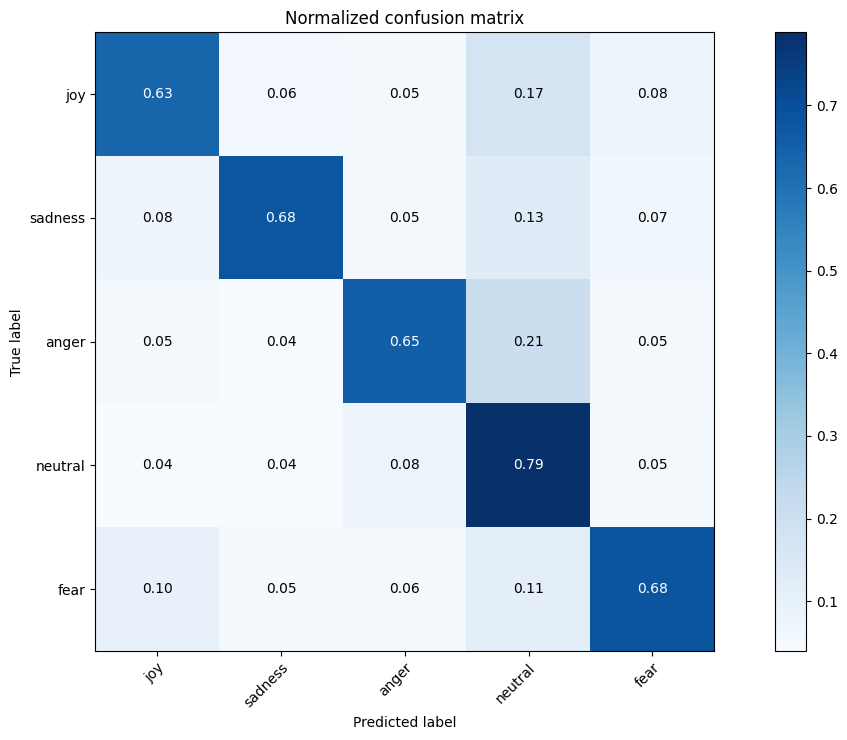

In [ ]:
grid_predictions = grid.predict(X_test_vect)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, grid_predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, grid_predictions, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
plot_confusion_matrix(y_test, grid_predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Decision Tree

Accuracy: 55.91%

F1 Score: 55.91

COnfusion Matrix:
 [[338  55  55 181  64]
 [ 99 350  46 142  42]
 [ 71  41 336 206  53]
 [ 37  15  29 538  19]
 [ 85  59  49 148 335]]


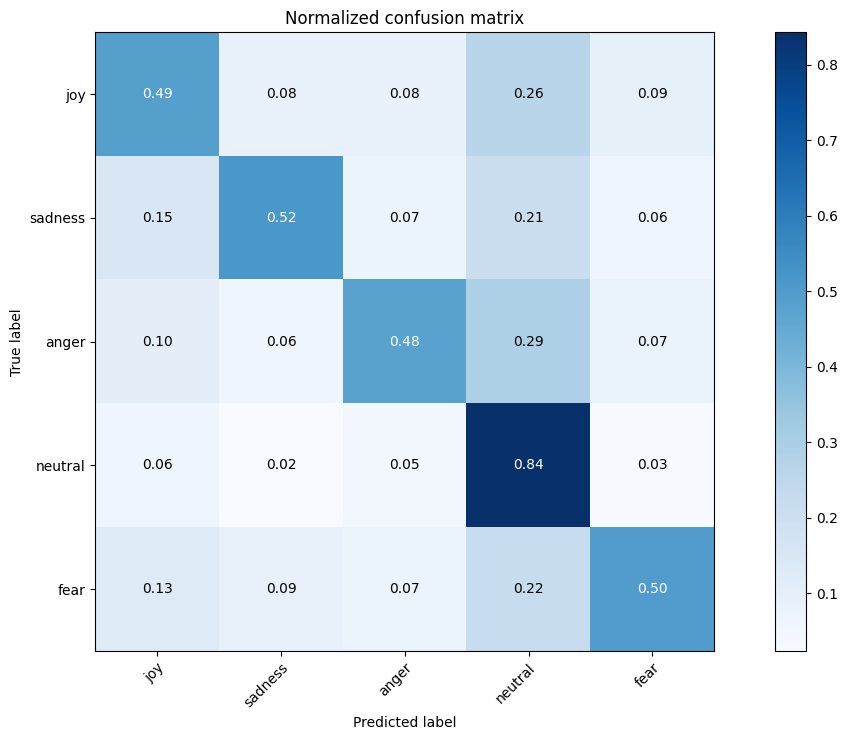

In [ ]:
from matplotlib import Parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model = DecisionTreeClassifier(random_state=0, max_depth=100)
model.fit(X_train_vect, y_train)

Parameter = yrf_pred = model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

##Save model and Demo

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
#Create pipeline with tf-idf vectorizer and Logistic model
LinearSVC_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

# save the model
filename = '/content/drive/MyDrive/ii 2023/CS116/SVC.sav'
pickle.dump(LinearSVC_model, open(filename, 'wb'))


model = pickle.load(open(filename, 'rb'))
message = 'I saw a ghost last day' 
print(model.predict([message]))

['fear']
